In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import csv
import plotly.plotly as py
import seaborn as sn
import statistics

data.csv includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Club,              
Wage, Preferred_Foot, Position, Height, Weight, ShortPassing, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Positioning, Penalties.         

In [3]:
master_data=pd.read_csv('data.csv')
master_data.head()
master_data.drop(columns = ['Unnamed: 0','Name','ID','WorkRate','BodyType','RealFace','LoanedFrom','Value','InternationalReputation','Joined','WeakFoot','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning','Aggression','Vision','Vision','Special', 'SkillMoves','Volleys', 'Dribbling', 'Curve',
       'Interceptions', 'HeadingAccuracy','Crossing', 'Potential','Finishing', 'GKReflexes', 'ReleaseClause','ContractValidUntil','JerseyNumber','Flag','ClubLogo','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Photo','Composure', 'Marking', 'StandingTackle', 'SlidingTackle'], inplace=True)
master_data.columns.str.strip()
master_data.rename(columns = {'PreferredFoot':'Preferred_Foot'                              
                             }, inplace = True)
master_data.fillna(0, inplace=True)
# 

Подготовка данных, убираем NaN значения и обрабатываем категориальные признаки

In [4]:
master_data.head()

Age Nationality  Overall                Club   Wage Preferred_Foot  \
0   31   Argentina       94         FCBarcelona  €565K           Left   
1   33    Portugal       94            Juventus  €405K          Right   
2   26      Brazil       92  ParisSaint-Germain  €290K          Right   
3   27       Spain       91    ManchesterUnited  €260K          Right   
4   27     Belgium       91      ManchesterCity  €355K          Right   

  Position Height  Weight  ShortPassing    ...      Agility  Reactions  \
0       RF    5'7  159lbs          90.0    ...         91.0       95.0   
1       ST    6'2  183lbs          81.0    ...         87.0       96.0   
2       LW    5'9  150lbs          84.0    ...         96.0       94.0   
3       GK    6'4  168lbs          50.0    ...         60.0       90.0   
4      RCM   5'11  154lbs          92.0    ...         79.0       91.0   

   Balance  ShotPower  Jumping  Stamina  Strength  LongShots  Positioning  \
0     95.0       85.0     68.0     72.0      59.0       94.0         94.0   
1     70.0       95.0     95.0     88.0      79.0       93.0         95.0   
2     84.0       80.0     61.0     81.0      49.0       82.0         89.0   
3     43.0       31.0     67.0     43.0      64.0       12.0         12.0   
4     77.0       91.0     63.0     90.0      75.0       91.0         87.0   

   Penalties  
0       75.0  
1       85.0  
2       81.0  
3       40.0  
4       79.0  

[5 rows x 25 columns]

In [5]:
master_data['Wage'] = master_data.Wage.str.replace('€','')
master_data['Wage'] = master_data.Wage.str.replace('K','000')
master_data['Wage'] = master_data.Wage.astype('int64')
master_data['Weight'] = master_data.Weight.str.replace('lbs','').astype('float64')
master_data['Height'] = master_data.Height.str.replace('\'','.').astype('float64')
master_data.fillna(0, inplace=True)

In [6]:
master_data['Preferred_Foot'] = master_data.Preferred_Foot.astype('category')
master_data['Nationality'] = master_data.Nationality.astype('category')
master_data['Club'] = master_data.Club.astype('category')
master_data['Position'] = master_data.Position.astype('category')
master_data['Weight'] = master_data.Weight*0.454
master_data['Height'] = master_data.Height*30

In [19]:
master_data.columns
master_data.dtypes


Age                  int64
Nationality       category
Overall              int64
Club              category
Wage                 int64
Preferred_Foot    category
Position          category
Height             float64
Weight             float64
ShortPassing       float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Positioning        float64
Penalties          float64
dtype: object

point 2

In [234]:
np.mean(master_data.Weight)
np.mean(master_data.Age)
np.mean(master_data.Overall)              
np.mean(master_data.Wage)
np.mean(master_data.Height)             
np.mean(master_data.Weight)           
np.mean(master_data.ShortPassing)       
np.mean(master_data.FKAccuracy)         
np.mean(master_data.LongPassing)        
np.mean(master_data.BallControl)       
np.mean(master_data.Acceleration)       
np.mean(master_data.SprintSpeed)      
np.mean(master_data.Agility)            
np.mean(master_data.Reactions)          
np.mean(master_data.Balance)            
np.mean(master_data.ShotPower)         
np.mean(master_data.Jumping)            
np.mean(master_data.Stamina)            
np.mean(master_data.Strength)           
np.mean(master_data.LongShots)          
np.mean(master_data.Positioning)        
np.mean(master_data.Penalties)         

48.54859849110634

point 3

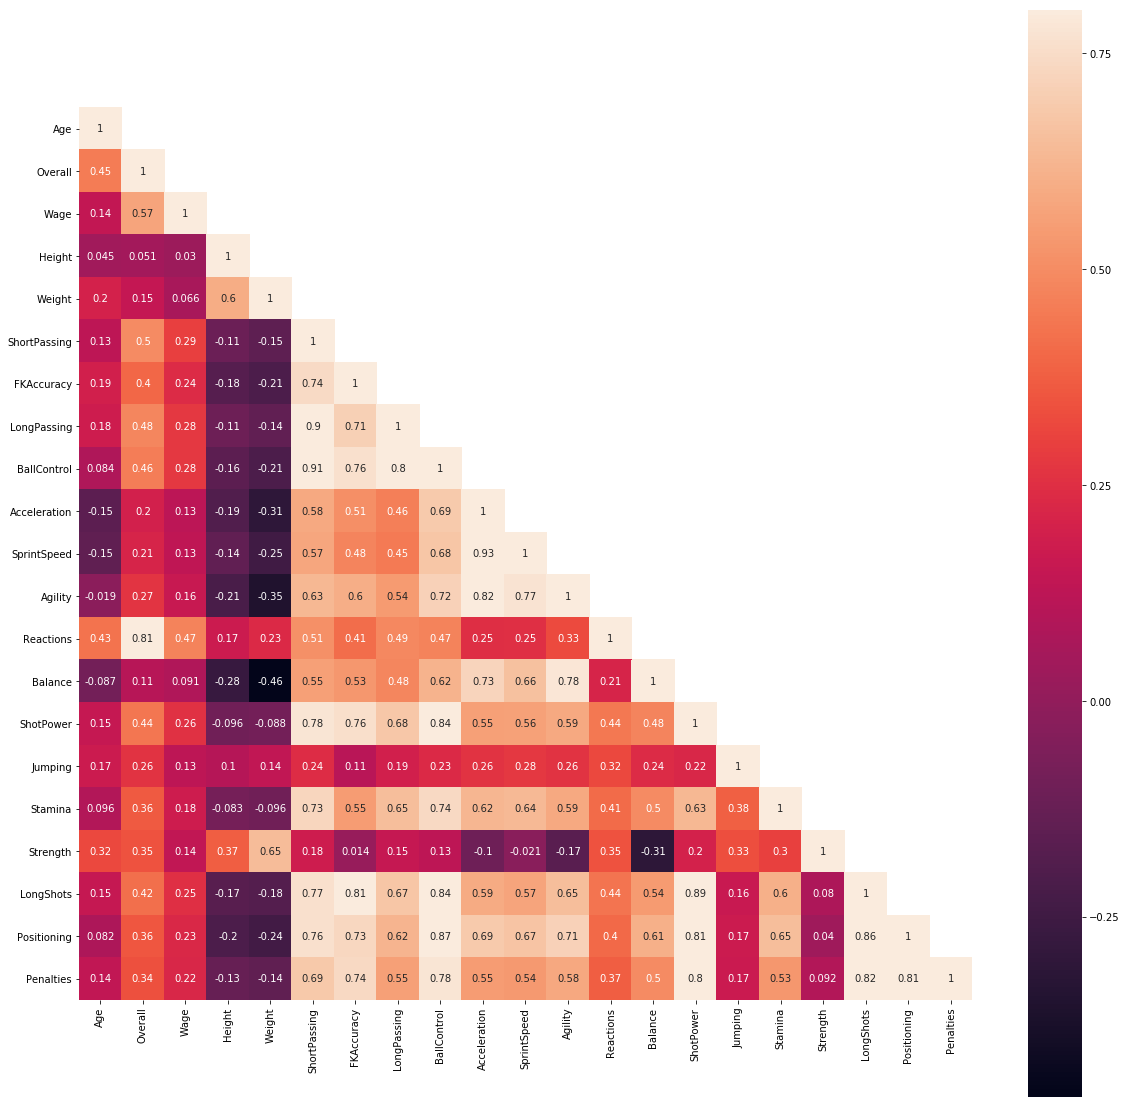

In [8]:
corr = master_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,20)
sn.heatmap(corr, mask=mask, vmax=.8, square=True, annot = True)

point 4

In [14]:
X = master_data.drop(['Overall',
                     'Nationality',
                      'Club',
                      'Preferred_Foot',
                      'Position'], axis=1)
Y = master_data['Overall']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

Коэффициенты регрессии

In [15]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, Y_train)
cdf = pd.DataFrame(lin_reg.coef_,X.columns, columns=['Coefficients'])
print(cdf)

              Coefficients
Age               0.211514
Wage              0.000071
Height           -0.035673
Weight           -0.073845
ShortPassing      0.022429
FKAccuracy        0.003757
LongPassing       0.011355
BallControl       0.066371
Acceleration      0.008291
SprintSpeed       0.030043
Agility           0.015937
Reactions         0.435258
Balance          -0.102713
ShotPower         0.021415
Jumping           0.004761
Stamina          -0.024182
Strength          0.035838
LongShots         0.020459
Positioning      -0.052231
Penalties        -0.028459


In [16]:
Y_pred = lin_reg.predict(X_test)
print(Y_pred)
# средне квадратическая ошибка
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

[64.80471102 59.97765414 66.54804682 ... 64.47172742 58.57222345
 67.87390069]
11.408254257124232


In [1]:
# X_train.isna().any()


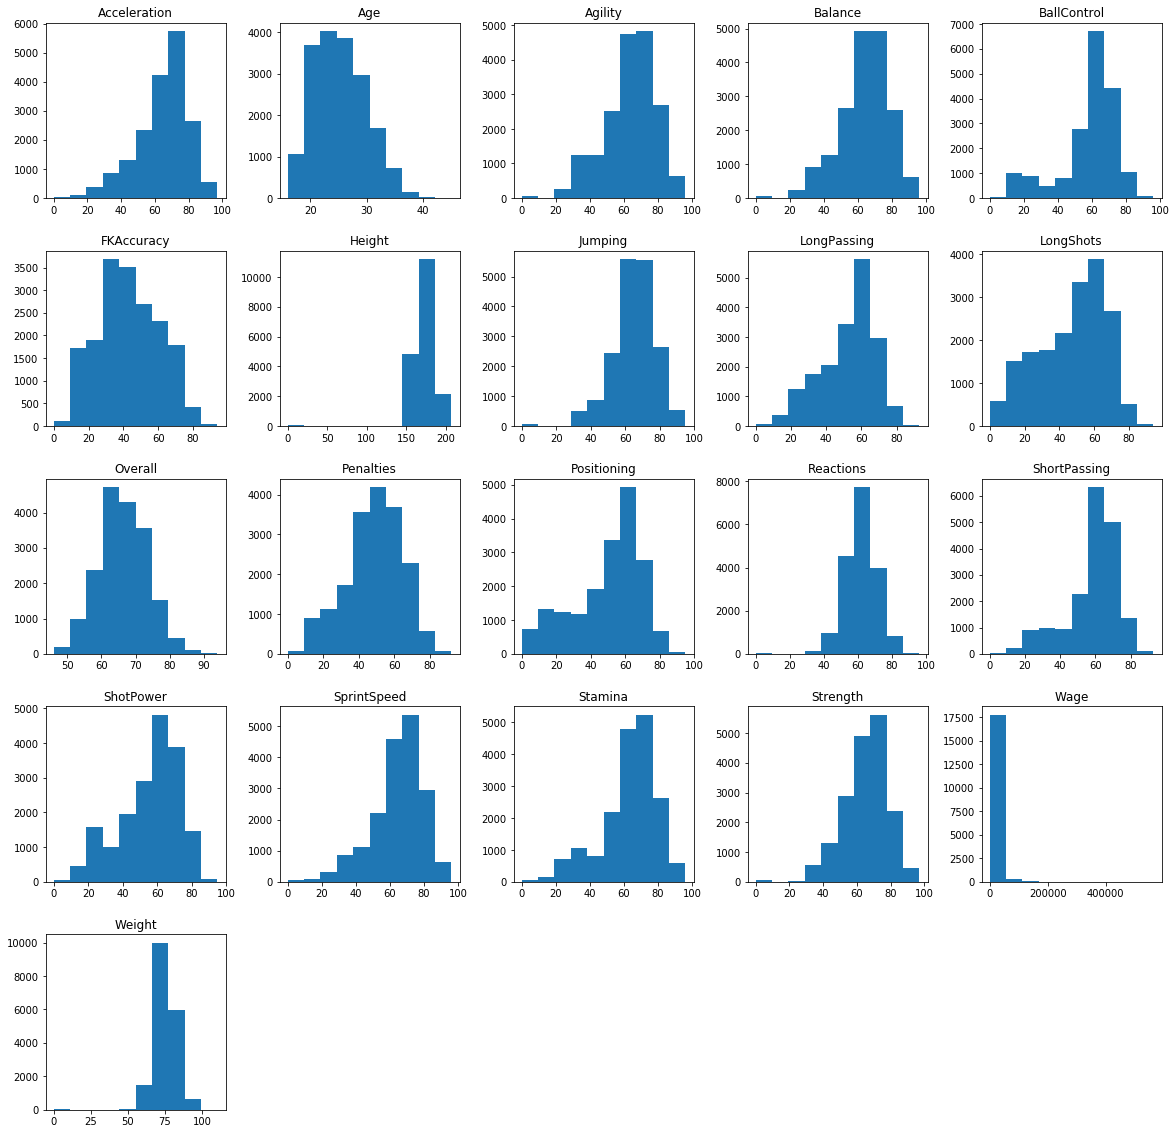

In [17]:
histohrams = master_data.hist(grid=False, figsize=(20, 20))